In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
%matplotlib inline

In [2]:
train_data = pd.read_csv("train.csv")
test_data = pd.read_csv("test.csv")

# Data Exploration

In [3]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [5]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.1+ KB


it is obvious we have missing values in both the training and test set, for now lets focus on the training data: let's visualize it:

In [6]:
import seaborn as sns 

<Axes: >

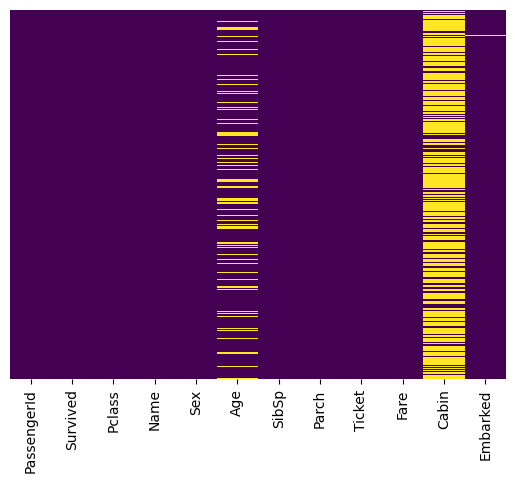

In [7]:
sns.heatmap(train_data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

we are missing some age information, alot of carbin information and few embarked 

In [8]:
train_data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


<Axes: xlabel='Survived', ylabel='count'>

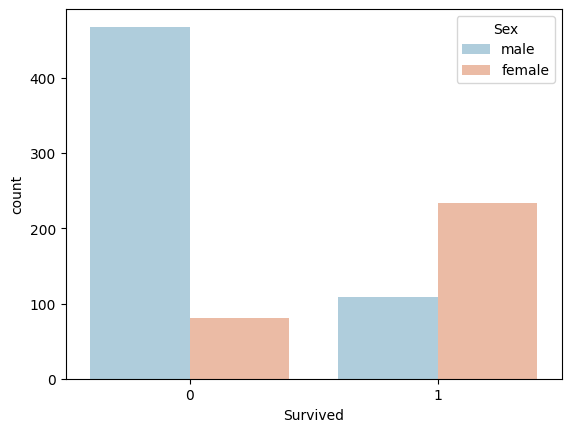

In [9]:
#let us explore more
sns.countplot(data=train_data, x='Survived', hue='Sex', palette='RdBu_r')

In [10]:
train_data['Sex'].value_counts()

Sex
male      577
female    314
Name: count, dtype: int64

<Axes: xlabel='Sex', ylabel='Survived'>

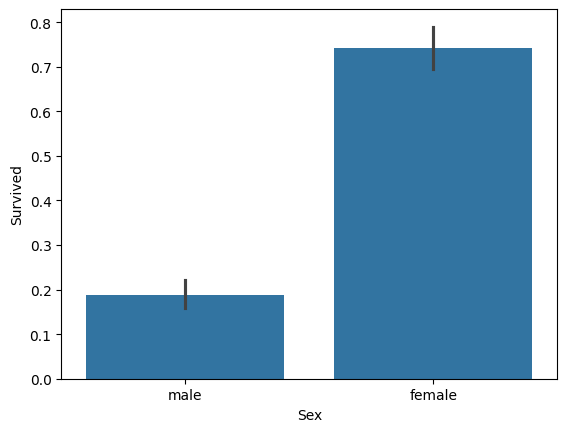

In [11]:

sns.barplot(data=train_data,x='Sex', y='Survived')

<Axes: xlabel='Sex', ylabel='count'>

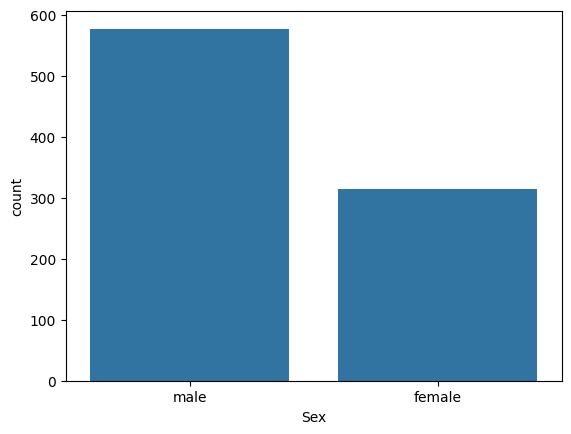

In [12]:
sns.countplot(data=train_data, x='Sex')

Female has a significantly higher survival chance than male. Most female passengers survived, while most male passengers did not.

<Axes: xlabel='Survived', ylabel='count'>

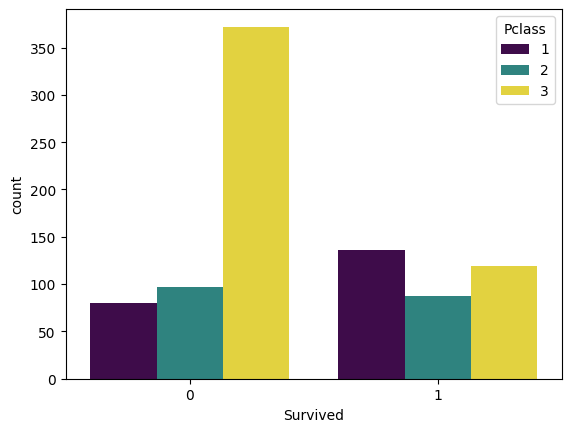

In [13]:
# Let's explore the passenger class:
sns.countplot(data=train_data, x='Survived', hue='Pclass', palette='viridis')

There are far more deaths in the 3rd class than the other classes. And there are also more survival in the 1st class.Lets check the total number of passenger in each class:

In [14]:
def count(Class):
    first = 0
    second = 0
    third = 0
    for passenger in Class:
        if passenger == 1:
            first += 1
        elif passenger == 2:
            second += 1
        else:
            third +=1
    print(" Total number of passengers in First class is ",first,", Second class is ", second,", And Third class is ", third)

In [15]:
count(train_data['Pclass'])

 Total number of passengers in First class is  216 , Second class is  184 , And Third class is  491


In [16]:
train_data['Pclass'].value_counts()     # same results

Pclass
3    491
1    216
2    184
Name: count, dtype: int64

In [17]:
# % of survival in 1st class is 62%
train_data[train_data["Pclass"] == 1]["Survived"].value_counts() / sum(train_data['Pclass']==1)  

Survived
1    0.62963
0    0.37037
Name: count, dtype: float64

In [18]:
# % of survival in 2st class is 47%
train_data[train_data["Pclass"] == 2]["Survived"].value_counts() / sum(train_data['Pclass']==2)  

Survived
0    0.527174
1    0.472826
Name: count, dtype: float64

In [19]:
# % of survival in 3rd class is only 24%
train_data[train_data["Pclass"] == 3]["Survived"].value_counts() / sum(train_data['Pclass']==3)  

Survived
0    0.757637
1    0.242363
Name: count, dtype: float64

62 percent survived in the first class, just 47 percent survived in the second class and as low as 24 percent survived in the third class. This shows that the class category plays a big role in the survival of the passenger.

In [20]:
#lets look at age distribution of passengers:'
#train_data['Age'].dropna().hist(bins=30)

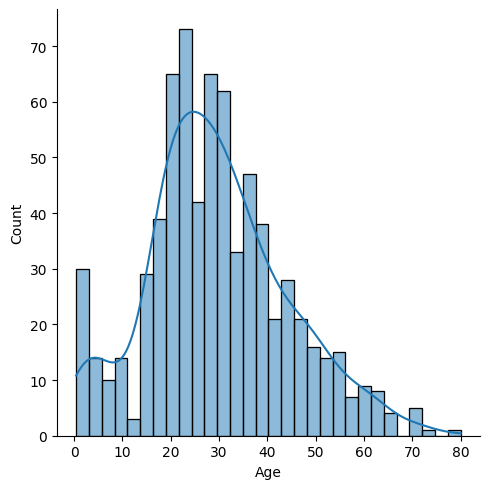

In [21]:
sns.displot(train_data['Age'].dropna(), bins=30,kde=True)

<Axes: xlabel='SibSp', ylabel='count'>

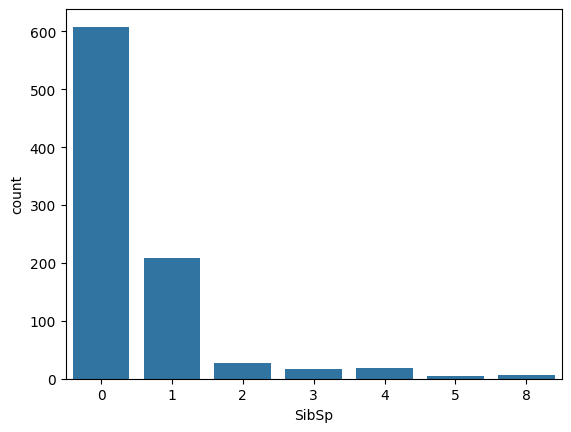

In [22]:
 # Number of sibling and spouse onboard
sns.countplot(train_data,x='SibSp')       

<Axes: xlabel='Parch', ylabel='count'>

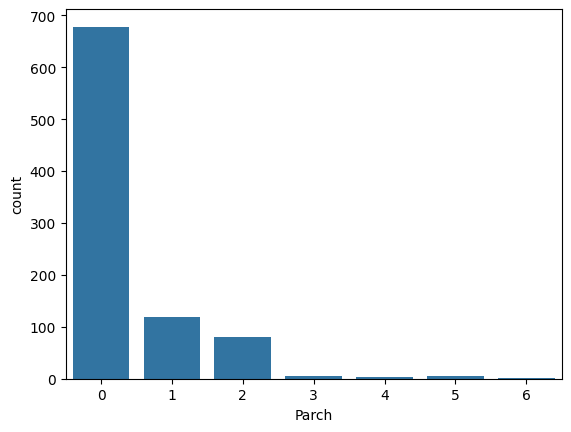

In [23]:
# The number of parents and children a passenger have aboard.
sns.countplot(train_data, x='Parch')        

In [24]:
train_data[['Age','Fare']].corr()

,Age,Fare
Age,1.000000,0.096067
Fare,0.096067,1.000000


In [25]:
train_data.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C


# Feature Engineering

In [26]:
# lets check how many people have multiple cabins --- (Idea from Ken Jee(Youtube))
train_data['Multiple_cabins'] = train_data.Cabin.apply(lambda x: 0 if pd.isnull(x) else len(x.split(' ')))

In [27]:
train_data['Multiple_cabins'].value_counts()

Multiple_cabins
0    687
1    180
2     16
3      6
4      2
Name: count, dtype: int64

Most people dont have multiple cabins

In [28]:
# lets look at the survival rate based on those with multiple carbins
pd.pivot_table(data=train_data, columns='Multiple_cabins', values='Ticket', aggfunc='count', index='Survived')

Multiple_cabins,0,1,2,3,4
Survived,,,,,
0,481.0,58.0,7.0,3.0,NaN
1,206.0,122.0,9.0,3.0,2.0


In [29]:
sum(train_data['Cabin'].notna())

204

In [30]:
#train_data[train_data['Cabin'].notnull()]

In [31]:
# now let us check the first letter of the cabin to look at the survival rate.
# maybe passengers in similar cabins have a similar chance of survival, probably due to proximity,class e.t.c.
# we will treat null values like it's own category. n stands for null

In [32]:
train_data['Cabin_similar'] = train_data['Cabin'].apply(lambda y : str(y)[0])  # grabbing the first letter of each cabin

In [33]:
train_data['Cabin_similar'].value_counts()

Cabin_similar
n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: count, dtype: int64

In [34]:
train_data.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Multiple_cabins,Cabin_similar
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S,0,n


In [35]:
# Lets check the survival rate
pd.pivot_table(data=train_data,index='Survived', columns='Cabin_similar', values='Ticket', aggfunc='count')

Cabin_similar,A,B,C,D,E,F,G,T,n
Survived,,,,,,,,,
0,8.0,12.0,24.0,8.0,8.0,5.0,2.0,1.0,481.0
1,7.0,35.0,35.0,25.0,24.0,8.0,2.0,NaN,206.0


There is a pattern here, except for A, most passengers in the cabin with starting letters from B to F actually survived. most of those who did not survived are in n(i.e the null)

In [36]:
# lets take a more close look at the tickets
train_data[['Ticket']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   Ticket  891 non-null    object
dtypes: object(1)
memory usage: 7.1+ KB


In [37]:
train_data['Ticket'][:10]

0           A/5 21171
1            PC 17599
2    STON/O2. 3101282
3              113803
4              373450
5              330877
6               17463
7              349909
8              347742
9              237736
Name: Ticket, dtype: object

In [38]:
train_data['Numeric_ticket'] = train_data.Ticket.apply(lambda x: 1 if x.isdigit()
                                                       else 0)

In [39]:
train_data['Ticket_letters'] = train_data['Ticket'].apply(lambda x: ''.join(x.split(' ')[:-1]).replace
                                                          ('.','').replace('/','').lower() if len(x.split(' ')[:-1]) > 0 else 0)

In [40]:
# let us view all the rows in the dataframe through scrolling.
# This is for convinience ----->>>

In [41]:
pd.set_option('display.max_rows', None)
train_data['Ticket_letters'].value_counts()

Ticket_letters
0            665
pc            60
ca            41
a5            21
stono2        18
sotonoq       15
scparis       11
wc            10
a4             7
soc            6
fcc            5
c              5
sopp           3
pp             3
wep            3
ppp            2
scah           2
sotono2        2
swpp           2
fc             1
scahbasle      1
as             1
sp             1
sc             1
scow           1
fa             1
sop            1
sca4           1
casoton        1
Name: count, dtype: int64

In [42]:
train_data['Numeric_ticket'].value_counts()

Numeric_ticket
1    661
0    230
Name: count, dtype: int64

In [43]:
# The ticket letters are so many and hard to know if there are some correlation between letters with thesame characters.
# But we can check the survival ratio based off of the Numeric_ticket:

In [44]:
pd.pivot_table(data=train_data, values='Ticket', index='Survived', aggfunc='count', columns='Numeric_ticket')

Numeric_ticket,0,1
Survived,,
0,142,407
1,88,254


The survival ration based off of the Numeric_ticket is almost the same. So there is not much to do with it here.

Text(0.5, 0, 'Fare')

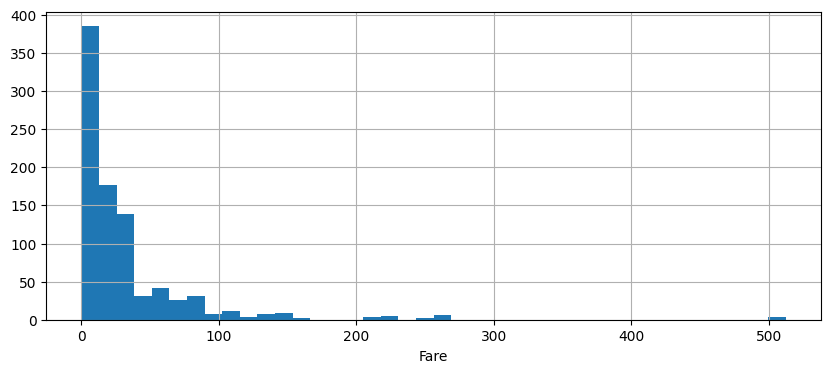

In [45]:
train_data['Fare'].hist(bins=40, figsize=(10,4))        #  Fare
plt.xlabel('Fare')

In [46]:
# lets us looka at the summary of survival based off of some columns from our data set

In [47]:
print(pd.pivot_table(train_data,values='Ticket',aggfunc='count', columns='Sex',index='Survived'))
print('\n')
print(pd.pivot_table(train_data,values='Ticket',aggfunc='count', columns='Pclass',index='Survived'))
print('\n')
print(pd.pivot_table(train_data,values='Ticket',aggfunc='count', columns='Embarked',index='Survived'))

Sex       female  male
Survived              
0             81   468
1            233   109


Pclass      1   2    3
Survived              
0          80  97  372
1         136  87  119


Embarked   C   Q    S
Survived             
0         75  47  427
1         93  30  217


In [48]:
pd.pivot_table(train_data,index='Survived', values=['Age', 'SibSp', 'Fare', 'Parch'])

,Age,Fare,Parch,SibSp
Survived,,,,
0,30.626179,22.117887,0.329690,0.553734
1,28.343690,48.395408,0.464912,0.473684


In [49]:
# let us look at the names' title
# titles such as Dr.,sir e.t.c. generally show more affluence than maybe Mr., or Miss e.t.c
train_data[['Name']].head()

,Name
0,"Braund, Mr. Owen Harris"
1,"Cumings, Mrs. John Bradley (Florence Briggs Th..."
2,"Heikkinen, Miss. Laina"
3,"Futrelle, Mrs. Jacques Heath (Lily May Peel)"
4,"Allen, Mr. William Henry"


In [50]:
train_data['Name_titles'] = train_data.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [51]:
train_data['Name_titles'].value_counts()

Name_titles
Mr              517
Miss            182
Mrs             125
Master           40
Dr                7
Rev               6
Mlle              2
Major             2
Col               2
the Countess      1
Capt              1
Ms                1
Sir               1
Lady              1
Mme               1
Don               1
Jonkheer          1
Name: count, dtype: int64

In [52]:
sum(train_data['Name_titles'].value_counts())

891

In [53]:
# let's check whether the col.s Survived
train_data[train_data['Name_titles'] == 'Col']['Survived']

647    1
694    0
Name: Survived, dtype: int64

In [54]:
# let's check whether the Majors survived
train_data[train_data['Name_titles'] == 'Major']['Survived']

449    1
536    0
Name: Survived, dtype: int64

In [55]:
# lets check whether the captain survived
train_data[train_data['Name_titles'] == 'Capt']['Survived']

745    0
Name: Survived, dtype: int64

In [56]:
# let's check the Drs who survived
train_data[train_data['Name_titles'] == 'Dr']['Survived']

245    0
317    0
398    0
632    1
660    1
766    0
796    1
Name: Survived, dtype: int64

In [57]:
# Now let us divide the name_title column into two
# regular and VIP's
# then we check the number of survival based of these categories

In [58]:
def grouping(title):
    Title = ['Mr','Mrs','Miss']
    for a_title in Title:
        if a_title in title:
            return "Regular"
        else:
            return "VIP"

In [59]:
train_data['Title'] = train_data.Name_titles.apply(lambda x: grouping(x))

In [60]:
# Let us check the value counts:
train_data['Title'].value_counts()

Title
Regular    642
VIP        249
Name: count, dtype: int64

In [61]:
train_data.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Multiple_cabins,Cabin_similar,Numeric_ticket,Ticket_letters,Name_titles,Title
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S,0,n,0,a5,Mr,Regular


In [62]:
# Now we check the survival based off of the Title column
pd.pivot_table(data=train_data, index='Survived', columns='Title', aggfunc='count', values='Ticket')

Title,Regular,VIP
Survived,,
0,462,87
1,180,162


Most people in the Regular did not survive, and most of those in the VIP actually made it alive.

In [63]:
# lets check the percentage of survival
print('REGULAR')
train_data[train_data['Title'] == 'Regular']['Survived'].value_counts() / sum(train_data['Title']=='Regular')

REGULAR


Survived
0    0.719626
1    0.280374
Name: count, dtype: float64

In [64]:
print('VIP')
train_data[train_data['Title'] == 'VIP']['Survived'].value_counts() / sum(train_data['Title']=='VIP')

VIP


Survived
1    0.650602
0    0.349398
Name: count, dtype: float64

We can see that 65% of those in the Vip survived, while less than 30% survived in the Regular. There is a clear pattern here.

In [65]:
# lets add up the number of parents and siblings a passanger have aboard as Family:

In [66]:
train_data['Family'] = train_data['SibSp'] + train_data['Parch']

In [67]:
train_data['Family'].value_counts()

Family
0     537
1     161
2     102
3      29
5      22
4      15
6      12
10      7
7       6
Name: count, dtype: int64

In [68]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PassengerId      891 non-null    int64  
 1   Survived         891 non-null    int64  
 2   Pclass           891 non-null    int64  
 3   Name             891 non-null    object 
 4   Sex              891 non-null    object 
 5   Age              714 non-null    float64
 6   SibSp            891 non-null    int64  
 7   Parch            891 non-null    int64  
 8   Ticket           891 non-null    object 
 9   Fare             891 non-null    float64
 10  Cabin            204 non-null    object 
 11  Embarked         889 non-null    object 
 12  Multiple_cabins  891 non-null    int64  
 13  Cabin_similar    891 non-null    object 
 14  Numeric_ticket   891 non-null    int64  
 15  Ticket_letters   891 non-null    object 
 16  Name_titles      891 non-null    object 
 17  Title           

We still have some missing values in the dataset. Let's work on that :

# Cleaning the Data

In [69]:
import cufflinks as cf

In [70]:
cf.go_offline()

In [71]:
# lets get the median age per class
box_age = train_data[['Pclass', 'Age']]
box_age.pivot(columns = 'Pclass', values = 'Age').iplot(kind='box')

In [72]:
train_data['Age'].mean()

29.69911764705882

In [73]:
train_data['Age'].max(), train_data['Age'].min()

(80.0, 0.42)

In [74]:
train_data[train_data['Age'] >= 60]['Age'].count()

26

In [75]:
# Let us calculate the median age for each class.
# while the mean age of the dataset is 29.6, there are 26 people over the age of 60 in the data.
def cal_median(df):
    print('The median age for Class 1 is:', df[df['Pclass'] == 1]['Age'].median())
    print('The median age for class 2 is:', df[df['Pclass'] == 2]['Age'].median())
    print('The median age for class 3 is:', df[df['Pclass'] == 3]['Age'].median())
    
cal_median(train_data)

The median age for Class 1 is: 37.0
The median age for class 2 is: 29.0
The median age for class 3 is: 24.0


from above, the median age for class 1 is 37, for class 2 is 29, and for class 3 is 24. lets use the median ages of each to fill up the missing values in in the data set.

In [76]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):
        if Pclass == 1:
            return 37
        elif Pclass == 2:
            return 29
        else:
            return 24
    else:
        return Age

In [77]:
train_data['Age'] = train_data[['Age', 'Pclass']].apply(impute_age, axis=1)

C:\Users\ENG MUBARAK\AppData\Local\Temp\ipykernel_7592\1334420608.py:2: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\ENG MUBARAK\AppData\Local\Temp\ipykernel_7592\1334420608.py:3: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



<Axes: >

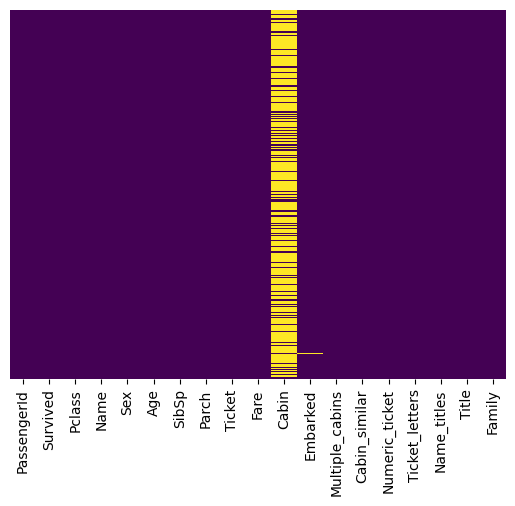

In [78]:
# lets check if the null values have been replaced
sns.heatmap(train_data.isnull(), yticklabels=False, cbar=False, cmap='viridis')

There is too much information missing from the cabin column. so lets first drop it.

In [79]:
train_data['Cabin'].nunique()

147

In [80]:
train_data['Cabin'].isnull().value_counts()

Cabin
True     687
False    204
Name: count, dtype: int64

In [81]:
train_data.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Multiple_cabins,Cabin_similar,Numeric_ticket,Ticket_letters,Name_titles,Title,Family
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,NaN,S,0,n,0,a5,Mr,Regular,1


In [82]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   PassengerId      891 non-null    int64  
 1   Survived         891 non-null    int64  
 2   Pclass           891 non-null    int64  
 3   Name             891 non-null    object 
 4   Sex              891 non-null    object 
 5   Age              891 non-null    float64
 6   SibSp            891 non-null    int64  
 7   Parch            891 non-null    int64  
 8   Ticket           891 non-null    object 
 9   Fare             891 non-null    float64
 10  Cabin            204 non-null    object 
 11  Embarked         889 non-null    object 
 12  Multiple_cabins  891 non-null    int64  
 13  Cabin_similar    891 non-null    object 
 14  Numeric_ticket   891 non-null    int64  
 15  Ticket_letters   891 non-null    object 
 16  Name_titles      891 non-null    object 
 17  Title           

In [83]:
train_data.drop('Cabin', axis=1, inplace=True)    # dropping the cabin column

Now lets check the Embarked Column:

In [84]:
train_data['Embarked'].nunique()

3

In [85]:
train_data['Embarked'].value_counts()

Embarked
S    644
C    168
Q     77
Name: count, dtype: int64

In [86]:
sum(train_data['Embarked'].isnull())

2

we have two null values in the Embarked column. lets fill it with the most appeared embarked label.that is the mode value

In [87]:
train_data['Embarked'].mode()

0    S
Name: Embarked, dtype: object

In [88]:
train_data.fillna({'Embarked':'S'},inplace=True)     # filling the missing values with the mode

In [89]:
sum(train_data['Embarked'].isnull())

0

In [90]:
train_data.isnull().sum() / train_data.shape[0]

PassengerId        0.0
Survived           0.0
Pclass             0.0
Name               0.0
Sex                0.0
Age                0.0
SibSp              0.0
Parch              0.0
Ticket             0.0
Fare               0.0
Embarked           0.0
Multiple_cabins    0.0
Cabin_similar      0.0
Numeric_ticket     0.0
Ticket_letters     0.0
Name_titles        0.0
Title              0.0
Family             0.0
dtype: float64

In [91]:
#looking at survival based on age groups
#by dividing the age into 8 categories
train_data['Age'].max(), train_data['Age'].min(),

(80.0, 0.42)

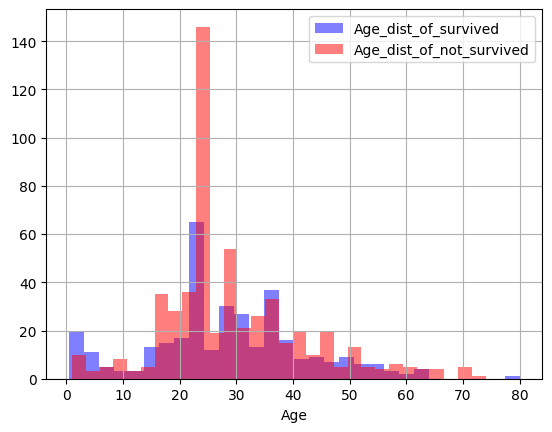

In [92]:
train_data[train_data['Survived'] == 1]['Age'].hist(alpha=0.5, color='blue', label='Age_dist_of_survived',bins=30)
train_data[train_data['Survived'] == 0]['Age'].hist(alpha=0.5, color='red', label='Age_dist_of_not_survived',bins=30)
plt.xlabel('Age')
plt.legend()

In [93]:
train_data['age_groups'] = pd.cut(train_data['Age'], range(0,90,10),
                                labels=['0-10','11-20','21-30','31-40','41-50','51-60','61-70','71-80'])

<Axes: >

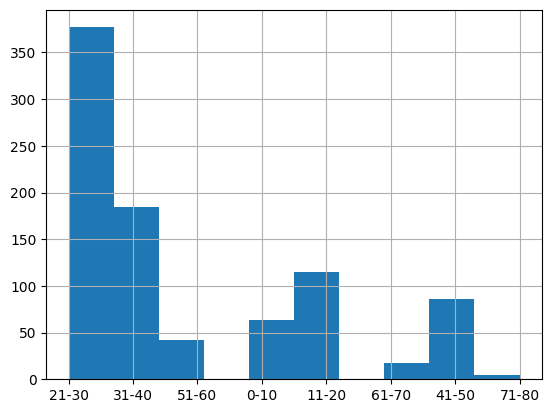

In [94]:
train_data['age_groups'].hist()

In [95]:
sum(train_data['age_groups'].value_counts())

891

In [96]:
pd.pivot_table(train_data, columns='age_groups',index='Survived',aggfunc='count',values='Ticket', observed=False)

age_groups,0-10,11-20,21-30,31-40,41-50,51-60,61-70,71-80
Survived,,,,,,,,
0,26,71,255,102,53,25,13,4
1,38,44,122,83,33,17,4,1


# LET'S HANDLE THE TEXT CATEGORY IN THE COLUMN:

In [97]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   PassengerId      891 non-null    int64   
 1   Survived         891 non-null    int64   
 2   Pclass           891 non-null    int64   
 3   Name             891 non-null    object  
 4   Sex              891 non-null    object  
 5   Age              891 non-null    float64 
 6   SibSp            891 non-null    int64   
 7   Parch            891 non-null    int64   
 8   Ticket           891 non-null    object  
 9   Fare             891 non-null    float64 
 10  Embarked         891 non-null    object  
 11  Multiple_cabins  891 non-null    int64   
 12  Cabin_similar    891 non-null    object  
 13  Numeric_ticket   891 non-null    int64   
 14  Ticket_letters   891 non-null    object  
 15  Name_titles      891 non-null    object  
 16  Title            891 non-null    object  
 1

In [98]:
# LETS CHECK THE UNIQUE VALUES ON THE ENGINEERED COLUMNS:
print("unique values in cabin_similar: ",train_data['Cabin_similar'].nunique())
print()
print("unique values in Embarked: ",train_data['Embarked'].nunique())
print()
print("unique values in TIcket_letters: ",train_data['Ticket_letters'].nunique())
print()
print("unique values in Numeric_ticket: ",train_data['Numeric_ticket'].nunique())
print()
print("unique values in Title: ",train_data['Title'].nunique())

unique values in cabin_similar:  9

unique values in Embarked:  3

unique values in TIcket_letters:  29

unique values in Numeric_ticket:  2

unique values in Title:  2


In [99]:
train_data.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Multiple_cabins,Cabin_similar,Numeric_ticket,Ticket_letters,Name_titles,Title,Family,age_groups
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,S,0,n,0,a5,Mr,Regular,1,21-30


In [100]:
sex = pd.get_dummies(train_data['Sex'], dtype=int, drop_first=True)

In [101]:
sex.head(3)

,male
0,1
1,0
2,0


In [102]:
embarked =pd.get_dummies(train_data['Embarked'], dtype=int, drop_first=True)

In [103]:
embarked.head()

,Q,S
0,0,1
1,0,0
2,0,1
3,0,1
4,0,1


In [104]:
title = pd.get_dummies(train_data['Title'], dtype=int, drop_first=True)

In [105]:
title.head()

,VIP
0,0
1,0
2,1
3,0
4,0


In [106]:
title.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype
---  ------  --------------  -----
 0   VIP     891 non-null    int32
dtypes: int32(1)
memory usage: 3.6 KB


In [107]:
train_data.head(1)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Multiple_cabins,Cabin_similar,Numeric_ticket,Ticket_letters,Name_titles,Title,Family,age_groups
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.25,S,0,n,0,a5,Mr,Regular,1,21-30


In [108]:
# The Cabin_similar column has up to 9 categories
# We will use the one_hot_encoder to convert it into numbers
from sklearn.preprocessing import OneHotEncoder

In [109]:
cabin_encoder = OneHotEncoder(sparse_output=False)

In [110]:
cabin_encoder1 = cabin_encoder.fit_transform(train_data[['Multiple_cabins']])

In [111]:
cabin_encoder.categories_

[array([0, 1, 2, 3, 4], dtype=int64)]

In [112]:
cabin_df = pd.DataFrame(cabin_encoder1, columns=cabin_encoder.get_feature_names_out(['Multiple_cabins']))

In [113]:
cabin_df.head()

,Multiple_cabins_0,Multiple_cabins_1,Multiple_cabins_2,Multiple_cabins_3,Multiple_cabins_4
0,1.0,0.0,0.0,0.0,0.0
1,0.0,1.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0
3,0.0,1.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0


In [114]:
age_group_encoder1 = OneHotEncoder(sparse_output=False)

In [115]:
age_group_encoder = age_group_encoder1.fit_transform(train_data[['age_groups']])

In [116]:
age_group_encoder1.categories_

[array(['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70',
        '71-80'], dtype=object)]

In [117]:
age_df = pd.DataFrame(age_group_encoder, columns=age_group_encoder1.get_feature_names_out(['age_groups']))

In [118]:
age_df.head()

,age_groups_0-10,age_groups_11-20,age_groups_21-30,age_groups_31-40,age_groups_41-50,age_groups_51-60,age_groups_61-70,age_groups_71-80
0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [119]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 19 columns):
 #   Column           Non-Null Count  Dtype   
---  ------           --------------  -----   
 0   PassengerId      891 non-null    int64   
 1   Survived         891 non-null    int64   
 2   Pclass           891 non-null    int64   
 3   Name             891 non-null    object  
 4   Sex              891 non-null    object  
 5   Age              891 non-null    float64 
 6   SibSp            891 non-null    int64   
 7   Parch            891 non-null    int64   
 8   Ticket           891 non-null    object  
 9   Fare             891 non-null    float64 
 10  Embarked         891 non-null    object  
 11  Multiple_cabins  891 non-null    int64   
 12  Cabin_similar    891 non-null    object  
 13  Numeric_ticket   891 non-null    int64   
 14  Ticket_letters   891 non-null    object  
 15  Name_titles      891 non-null    object  
 16  Title            891 non-null    object  
 1

In [120]:
train_data_1 = train_data.copy()

In [121]:
train_data_1 = pd.concat([train_data, sex, embarked, title, cabin_df, age_df ], axis=1)

In [122]:
train_data_1.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Multiple_cabins_3,Multiple_cabins_4,age_groups_0-10,age_groups_11-20,age_groups_21-30,age_groups_31-40,age_groups_41-50,age_groups_51-60,age_groups_61-70,age_groups_71-80
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [123]:
train_data_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 36 columns):
 #   Column             Non-Null Count  Dtype   
---  ------             --------------  -----   
 0   PassengerId        891 non-null    int64   
 1   Survived           891 non-null    int64   
 2   Pclass             891 non-null    int64   
 3   Name               891 non-null    object  
 4   Sex                891 non-null    object  
 5   Age                891 non-null    float64 
 6   SibSp              891 non-null    int64   
 7   Parch              891 non-null    int64   
 8   Ticket             891 non-null    object  
 9   Fare               891 non-null    float64 
 10  Embarked           891 non-null    object  
 11  Multiple_cabins    891 non-null    int64   
 12  Cabin_similar      891 non-null    object  
 13  Numeric_ticket     891 non-null    int64   
 14  Ticket_letters     891 non-null    object  
 15  Name_titles        891 non-null    object  
 16  Title   

In [124]:
# lets scale the age and fare column
# we will define a function for this operation called scaling
from sklearn.preprocessing import StandardScaler

In [125]:
def scaling(df, columns):
    scaler = StandardScaler()

    # fitting and transforming the columns
    df[columns] = scaler.fit_transform(df[columns])

    # return the dataframe
    return df

In [126]:
train_data_1 = scaling(train_data_1, ['Age','Fare'])

In [127]:
train_data_1.head(3)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Multiple_cabins_3,Multiple_cabins_4,age_groups_0-10,age_groups_11-20,age_groups_21-30,age_groups_31-40,age_groups_41-50,age_groups_51-60,age_groups_61-70,age_groups_71-80
0,1,0,3,"Braund, Mr. Owen Harris",male,-0.533834,1,0,A/5 21171,-0.502445,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0.674891,1,0,PC 17599,0.786845,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,3,1,3,"Heikkinen, Miss. Laina",female,-0.231653,0,0,STON/O2. 3101282,-0.488854,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


# Cleaning the test set
1) The test data will be cleaned just as the training data was cleaned. This is to maintain consistency

In [128]:
test_data.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S


In [129]:
# adding the family feature
test_data['Family'] = test_data['SibSp'] + train_data['Parch']

In [130]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
 11  Family       418 non-null    float64
dtypes: float64(3), int64(4), object(5)
memory usage: 39.3+ KB


In [131]:
# let's calculate the median age of the test_data
# we will use the calculate median (cal_median) function used for the training data
cal_median(test_data)

The median age for Class 1 is: 42.0
The median age for class 2 is: 26.5
The median age for class 3 is: 24.0


In [132]:
def impute_age(cols):
    Age = cols[0]
    Pclass = cols[1]

    if pd.isnull(Age):
        if Pclass == 1:
            return 42.0
        elif Pclass == 2:
            return 26.5
        else:
            return 24.0
    else:
        return Age

In [133]:
# lets fill the missing data in the age column with the median age in each class
# we will apply the impute_age function
test_data['Age'] = test_data[['Age', 'Pclass']].apply(impute_age, axis=1)

C:\Users\ENG MUBARAK\AppData\Local\Temp\ipykernel_7592\1375907931.py:2: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`

C:\Users\ENG MUBARAK\AppData\Local\Temp\ipykernel_7592\1375907931.py:3: FutureWarning:

Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`



In [134]:
# we will only do the neccessary feature engineering on the test set
# i.e only on the columns we are going to use to build and test our model(s) 
# lets start with cabin to get cabin_similar
test_data['Cabin_similar'] = test_data['Cabin'].apply(lambda y : str(y)[0])  # grabbing the first letter of each cabin

In [135]:
print(test_data['Cabin_similar'].value_counts(), train_data['Cabin_similar'].value_counts())

Cabin_similar
n    327
C     35
B     18
D     13
E      9
F      8
A      7
G      1
Name: count, dtype: int64 Cabin_similar
n    687
C     59
B     47
D     33
E     32
A     15
F     13
G      4
T      1
Name: count, dtype: int64


From above, the T cabin is not in the test data, and only one in the training data. so it shall be dropped

In [136]:
# lets create the Name_title column to get the titles of the passengers
test_data['Name_titles'] = test_data.Name.apply(lambda x: x.split(',')[1].split('.')[0].strip())

In [137]:
test_data['Name_titles'].value_counts(), train_data['Name_titles'].value_counts()

(Name_titles
 Mr        240
 Miss       78
 Mrs        72
 Master     21
 Col         2
 Rev         2
 Ms          1
 Dr          1
 Dona        1
 Name: count, dtype: int64,
 Name_titles
 Mr              517
 Miss            182
 Mrs             125
 Master           40
 Dr                7
 Rev               6
 Mlle              2
 Major             2
 Col               2
 the Countess      1
 Capt              1
 Ms                1
 Sir               1
 Lady              1
 Mme               1
 Don               1
 Jonkheer          1
 Name: count, dtype: int64)

In [138]:
# now lets create the Title column using the grouping function:
test_data['Title'] = test_data.Name_titles.apply(lambda x: grouping(x))

In [139]:
test_data['Title'].value_counts()

Title
Regular    312
VIP        106
Name: count, dtype: int64

In [140]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   PassengerId    418 non-null    int64  
 1   Pclass         418 non-null    int64  
 2   Name           418 non-null    object 
 3   Sex            418 non-null    object 
 4   Age            418 non-null    float64
 5   SibSp          418 non-null    int64  
 6   Parch          418 non-null    int64  
 7   Ticket         418 non-null    object 
 8   Fare           417 non-null    float64
 9   Cabin          91 non-null     object 
 10  Embarked       418 non-null    object 
 11  Family         418 non-null    float64
 12  Cabin_similar  418 non-null    object 
 13  Name_titles    418 non-null    object 
 14  Title          418 non-null    object 
dtypes: float64(3), int64(4), object(8)
memory usage: 49.1+ KB


In [141]:
# lets convert the categories from the cabin_similar column into digits
cabin_encoder2 = cabin_encoder.fit_transform(test_data[['Cabin_similar']])

In [142]:
cabin_encoder.categories_

[array(['A', 'B', 'C', 'D', 'E', 'F', 'G', 'n'], dtype=object)]

In [143]:
cabin_df2 = pd.DataFrame(cabin_encoder2, columns=cabin_encoder.get_feature_names_out(['Cabin_similar']))

In [144]:
cabin_df2.head()

,Cabin_similar_A,Cabin_similar_B,Cabin_similar_C,Cabin_similar_D,Cabin_similar_E,Cabin_similar_F,Cabin_similar_G,Cabin_similar_n
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [145]:
#lets use the pd.get_dummies to convert both the embarked and Title columns
embarked =pd.get_dummies(test_data['Embarked'], dtype=int, drop_first=True)
sex = pd.get_dummies(test_data['Sex'], dtype=int, drop_first=True)
title = pd.get_dummies(test_data['Title'], dtype=int, drop_first=True)

In [146]:
# age groups categorization
test_data['age_groups'] = pd.cut(test_data['Age'], range(0,90,10),
                                labels=['0-10','11-20','21-30','31-40','41-50','51-60','61-70','71-80'])

In [147]:
age_g_test_ecder1 = OneHotEncoder(sparse_output=False)

In [148]:
age_g_test_encder= age_g_test_ecder1.fit_transform(test_data[['age_groups']])

In [149]:
age_g_test_ecder1.categories_

[array(['0-10', '11-20', '21-30', '31-40', '41-50', '51-60', '61-70',
        '71-80'], dtype=object)]

In [150]:
age_test_df = pd.DataFrame(age_g_test_encder, columns=age_g_test_ecder1.get_feature_names_out(['age_groups']))

In [151]:
# Now we concatenate all the converted columns to the test_data
test_data = pd.concat([test_data, sex, embarked, title,age_test_df], axis=1)

In [152]:
test_data.head(2)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,S,VIP,age_groups_0-10,age_groups_11-20,age_groups_21-30,age_groups_31-40,age_groups_41-50,age_groups_51-60,age_groups_61-70,age_groups_71-80
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,...,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,...,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0


In [153]:
# lets take care of the missing value in the Fare column
# we will fill it with the mean of the passenger class it belongs to
test_data['Fare'].isnull().value_counts()

Fare
False    417
True       1
Name: count, dtype: int64

In [154]:
test_data[test_data['Fare'].isnull() == True]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,...,S,VIP,age_groups_0-10,age_groups_11-20,age_groups_21-30,age_groups_31-40,age_groups_41-50,age_groups_51-60,age_groups_61-70,age_groups_71-80
152,1044,3,"Storey, Mr. Thomas",male,60.5,0,0,3701,NaN,NaN,...,1,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [155]:
mean = test_data[test_data['Pclass'] == 3]['Fare'].mean()

In [156]:
test_data.fillna({'Fare': mean}, inplace=True)

In [157]:
test_data['Fare'].isnull().value_counts()

Fare
False    418
Name: count, dtype: int64

In [158]:
# Lets scale the test data using standardscaler via the scaling function
test_data = scaling(test_data, ['Age','Fare'])

# Dropping Columns 
1) we will drop the columns not needed(for now) for modelling
2) The columns in both the training and testing data must be the same

In [159]:
train_data_1.head(2)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,...,Multiple_cabins_3,Multiple_cabins_4,age_groups_0-10,age_groups_11-20,age_groups_21-30,age_groups_31-40,age_groups_41-50,age_groups_51-60,age_groups_61-70,age_groups_71-80
0,1,0,3,"Braund, Mr. Owen Harris",male,-0.533834,1,0,A/5 21171,-0.502445,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,0.674891,1,0,PC 17599,0.786845,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [160]:
train_data_1.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Embarked', 'Multiple_cabins',
       'Cabin_similar', 'Numeric_ticket', 'Ticket_letters', 'Name_titles',
       'Title', 'Family', 'age_groups', 'male', 'Q', 'S', 'VIP',
       'Multiple_cabins_0', 'Multiple_cabins_1', 'Multiple_cabins_2',
       'Multiple_cabins_3', 'Multiple_cabins_4', 'age_groups_0-10',
       'age_groups_11-20', 'age_groups_21-30', 'age_groups_31-40',
       'age_groups_41-50', 'age_groups_51-60', 'age_groups_61-70',
       'age_groups_71-80'],
      dtype='object')

In [161]:
train_data_1 = train_data_1.drop(['PassengerId','Name','SibSp','Sex','SibSp','Parch','Ticket','Embarked','Multiple_cabins_1', 'Multiple_cabins_2',
                                  'Multiple_cabins_0','Multiple_cabins_3', 'Multiple_cabins_4', 'Multiple_cabins','Cabin_similar',
                                  'Numeric_ticket','Ticket_letters','age_groups','Name_titles','Title'], axis=1, inplace=False)

In [162]:
train_data_1.head()

,Survived,Pclass,Age,Fare,Family,male,Q,S,VIP,age_groups_0-10,age_groups_11-20,age_groups_21-30,age_groups_31-40,age_groups_41-50,age_groups_51-60,age_groups_61-70,age_groups_71-80
0,0,3,-0.533834,-0.502445,1,1,0,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1,1,0.674891,0.786845,1,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,1,3,-0.231653,-0.488854,0,0,0,1,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1,1,0.448255,0.420730,1,0,0,1,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0,3,0.448255,-0.486337,0,1,0,1,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [163]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 28 columns):
 #   Column            Non-Null Count  Dtype   
---  ------            --------------  -----   
 0   PassengerId       418 non-null    int64   
 1   Pclass            418 non-null    int64   
 2   Name              418 non-null    object  
 3   Sex               418 non-null    object  
 4   Age               418 non-null    float64 
 5   SibSp             418 non-null    int64   
 6   Parch             418 non-null    int64   
 7   Ticket            418 non-null    object  
 8   Fare              418 non-null    float64 
 9   Cabin             91 non-null     object  
 10  Embarked          418 non-null    object  
 11  Family            418 non-null    float64 
 12  Cabin_similar     418 non-null    object  
 13  Name_titles       418 non-null    object  
 14  Title             418 non-null    object  
 15  age_groups        418 non-null    category
 16  male              418 non-

In [164]:
test_data = test_data.drop(['PassengerId','Name','Sex','SibSp','Parch','Ticket','Embarked','Cabin',
                            'Cabin_similar','Name_titles','Title','age_groups'], axis=1, inplace=False)

In [165]:
test_data.head()

,Pclass,Age,Fare,Family,male,Q,S,VIP,age_groups_0-10,age_groups_11-20,age_groups_21-30,age_groups_31-40,age_groups_41-50,age_groups_51-60,age_groups_61-70,age_groups_71-80
0,3,0.393048,-0.497311,0.0,1,1,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,3,1.356309,-0.512175,1.0,0,0,1,0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
2,2,2.512223,-0.463999,0.0,1,1,0,0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
3,3,-0.184909,-0.482373,0.0,1,0,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
4,3,-0.570214,-0.417392,1.0,0,0,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0


In [166]:
test_data.columns, train_data_1.columns

(Index(['Pclass', 'Age', 'Fare', 'Family', 'male', 'Q', 'S', 'VIP',
        'age_groups_0-10', 'age_groups_11-20', 'age_groups_21-30',
        'age_groups_31-40', 'age_groups_41-50', 'age_groups_51-60',
        'age_groups_61-70', 'age_groups_71-80'],
       dtype='object'),
 Index(['Survived', 'Pclass', 'Age', 'Fare', 'Family', 'male', 'Q', 'S', 'VIP',
        'age_groups_0-10', 'age_groups_11-20', 'age_groups_21-30',
        'age_groups_31-40', 'age_groups_41-50', 'age_groups_51-60',
        'age_groups_61-70', 'age_groups_71-80'],
       dtype='object'))

# Dividing features and target
1) The target variables will be separated from the data in the train_data set.
2) There is no target variables in the test data set(This is because the data is gotten from Kaggle competition)
3) Cross validation will be used to get the accuracy of models on the train_data set.
4) Bunch of supervised learning models will be explored: logistic reg, SVC, Kneighbors classifier, Decision Trees classifier and RandomForest classifier

In [167]:
X_train = train_data_1.drop('Survived',axis=1)
y_train = train_data_1['Survived']

In [168]:
X_train.head()

,Pclass,Age,Fare,Family,male,Q,S,VIP,age_groups_0-10,age_groups_11-20,age_groups_21-30,age_groups_31-40,age_groups_41-50,age_groups_51-60,age_groups_61-70,age_groups_71-80
0,3,-0.533834,-0.502445,1,1,0,1,0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
1,1,0.674891,0.786845,1,0,0,0,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,3,-0.231653,-0.488854,0,0,0,1,1,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0
3,1,0.448255,0.420730,1,0,0,1,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,3,0.448255,-0.486337,0,1,0,1,0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [169]:
X_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 16 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Pclass            891 non-null    int64  
 1   Age               891 non-null    float64
 2   Fare              891 non-null    float64
 3   Family            891 non-null    int64  
 4   male              891 non-null    int32  
 5   Q                 891 non-null    int32  
 6   S                 891 non-null    int32  
 7   VIP               891 non-null    int32  
 8   age_groups_0-10   891 non-null    float64
 9   age_groups_11-20  891 non-null    float64
 10  age_groups_21-30  891 non-null    float64
 11  age_groups_31-40  891 non-null    float64
 12  age_groups_41-50  891 non-null    float64
 13  age_groups_51-60  891 non-null    float64
 14  age_groups_61-70  891 non-null    float64
 15  age_groups_71-80  891 non-null    float64
dtypes: float64(10), int32(4), int64(2)
memory us

# Training models
1) Training models using various classification algorithm
2) checking their performance measure using cross validation
3) checking the confusion matrices of the best models

In [170]:
# Training models ------->
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC

from sklearn.metrics import confusion_matrix,precision_score, recall_score, classification_report, f1_score

In [171]:
#loigistic regression
log_reg = LogisticRegression()

In [172]:
log_crs_val_score = cross_val_score(log_reg, X_train, y_train, cv=5, scoring='accuracy')

In [173]:
log_crs_val_score.mean()

0.8002322515849603

In [174]:
#K nearest neighbor classifier
k_nn = KNeighborsClassifier()

In [175]:
k_nn_crs_val_score = cross_val_score(k_nn, X_train, y_train, cv=5, scoring='accuracy')

In [176]:
k_nn_crs_val_score.mean()

0.7856757265708367

In [177]:
# Decision tree classifier
d_tree_clf = DecisionTreeClassifier()

In [178]:
d_tree_clf_val_scr = cross_val_score(d_tree_clf, X_train, y_train, cv=5, scoring='accuracy')

In [179]:
d_tree_clf_val_scr.mean()

0.7721863034335572

In [180]:
#random forest
rand_frst = RandomForestClassifier()

In [181]:
rand_frst_crss_vsl_scr = cross_val_score(rand_frst, X_train, y_train, cv=5, scoring='accuracy')
rand_frst_crss_vsl_scr.mean()

0.8148201619484026

In [182]:
#SVC
svc = SVC(probability=True)

In [183]:
svc_crs_val_score = cross_val_score(svc, X_train, y_train, cv=5, scoring='accuracy')
svc_crs_val_score.mean()

0.8294017952419809

checking the confusion matrix of the top 3, that is the three models with mean score upto 80%. 
1) using the cross_val_predict function
2) check the precision and recall score

In [184]:
from sklearn.model_selection import cross_val_predict

In [185]:
#Logistic model
y_train_pred_log = cross_val_predict(log_reg, X_train, y_train, cv=5) 
print(confusion_matrix(y_train, y_train_pred_log))
print('\n')
print(classification_report(y_train, y_train_pred_log))

[[473  76]
 [102 240]]


              precision    recall  f1-score   support

           0       0.82      0.86      0.84       549
           1       0.76      0.70      0.73       342

    accuracy                           0.80       891
   macro avg       0.79      0.78      0.79       891
weighted avg       0.80      0.80      0.80       891



In [186]:
print("The precisioin score of the logistic model is: ", precision_score(y_train, y_train_pred_log))
print("The recall score of the logistc model is: ", recall_score(y_train, y_train_pred_log))
print('The F1 score is: ',f1_score(y_train, y_train_pred_log))

The precisioin score of the logistic model is:  0.759493670886076
The recall score of the logistc model is:  0.7017543859649122
The F1 score is:  0.729483282674772


While the score from the cross validation is 80%, The precision score of the model is 75%, that is only 75% predicted as survived were actually correct. And the recall only 70%. That is the model only about 70% of the actual survived passengers in the dataset were correctly identified.

In [187]:
# Random forest classifier
y_train_pred_forest = cross_val_predict(rand_frst, X_train, y_train, cv=5)
print(confusion_matrix(y_train, y_train_pred_forest))
print('\n')
print(classification_report(y_train, y_train_pred_forest))

[[463  86]
 [ 84 258]]


              precision    recall  f1-score   support

           0       0.85      0.84      0.84       549
           1       0.75      0.75      0.75       342

    accuracy                           0.81       891
   macro avg       0.80      0.80      0.80       891
weighted avg       0.81      0.81      0.81       891



In [188]:
print("The precisioin score of the forest classificaton model is: ", precision_score(y_train, y_train_pred_forest))
print("The recall score of the forest classificaton model is: ", recall_score(y_train, y_train_pred_forest))
print('The F1 score is: ',f1_score(y_train, y_train_pred_forest))

The precisioin score of the forest classificaton model is:  0.75
The recall score of the forest classificaton model is:  0.7543859649122807
The F1 score is:  0.7521865889212828


While the Precision score of the Random forest classification model is almost the same as the Logisitic model, it has a better recall value than the Logistic model, with a recall score of about 74%. That is 74% of the passengers that actually survived where correctly identified. It has an F1-score of 74% again 72% of Logistic model F1-score. This is overall a better model than the Logistic model

In [189]:
# SVC Classifier
y_train_pred_svc = cross_val_predict(svc, X_train, y_train, cv=5)
print(confusion_matrix(y_train, y_train_pred_svc))
print('\n')
print(classification_report(y_train, y_train_pred_svc))

[[491  58]
 [ 94 248]]


              precision    recall  f1-score   support

           0       0.84      0.89      0.87       549
           1       0.81      0.73      0.77       342

    accuracy                           0.83       891
   macro avg       0.82      0.81      0.82       891
weighted avg       0.83      0.83      0.83       891



In [190]:
print("The precisioin score of the SVC model is: ", precision_score(y_train, y_train_pred_svc))
print("The recall score of the SVC model is: ", recall_score(y_train, y_train_pred_svc))
print('The F1 score is: ',f1_score(y_train, y_train_pred_svc))

The precisioin score of the SVC model is:  0.8104575163398693
The recall score of the SVC model is:  0.7251461988304093
The F1 score is:  0.7654320987654321


In [191]:
len(train_data[train_data['Survived'] == 1]), len(train_data[train_data['Survived'] == 0])

(342, 549)

In [192]:
# How balanced is the classes ?
549/891, 342/891

(0.6161616161616161, 0.3838383838383838)

From above, we can see that the two classes are highly inbalanced, with the not-survived class almost doubled the survived.

# precision/recall trade-off
Let us first calculate the predicted probabilities of both models:

In [193]:
y_probas_forest = cross_val_predict(rand_frst, X_train, y_train, cv=5, 
                                    method='predict_proba')[:,1]

In [194]:
y_probas_svc = cross_val_predict(svc, X_train, y_train, cv=5, 
                                    method='predict_proba')[:,1]

In [195]:
from sklearn.metrics import precision_recall_curve, auc

In [196]:
# precision, recall and threshold for random forest classifier
precision_frst, recalls_frst, threshold_frst = precision_recall_curve(y_train, y_probas_forest)

# precision, recall and threshold for support vector machine classifeir
precision_svc, recalls_svc, threshold_svc = precision_recall_curve(y_train, y_probas_svc)

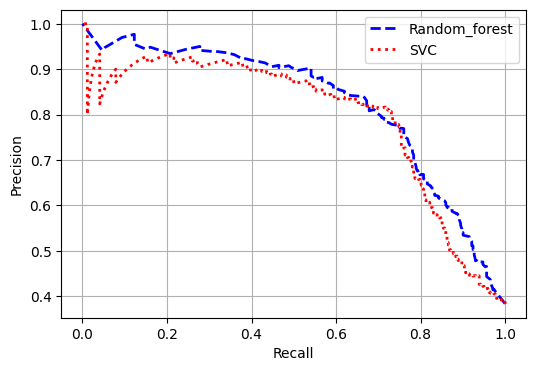

In [197]:
# let's create a function that plots the precision_recall curves for both models
def plot_precision_recall_curve(precision_frst,recall_frst,precision_svc,recall_svc):
    plt.plot(recall_frst,precision_frst, 'b--', lw=2, label = 'Random_forest')
    plt.plot(recall_svc,precision_svc, 'r:', lw=2, label = 'SVC')
    plt.xlabel('Recall'); plt.ylabel('Precision')
    plt.grid(True)
    plt.legend()

plt.figure(figsize=(6,4))
plot_precision_recall_curve(precision_frst,recalls_frst,precision_svc,recalls_svc)

from the above curve, it looks like the random forest classifier performs much better than the support vector classifier, lets caculate the areas under the curve for both models to confirm:

In [198]:
# Area under the curve for both models:
forest_auc = auc(recalls_frst, precision_frst)
svc_auc = auc(recalls_svc, precision_svc)

In [199]:
print(f"Area under the curve for forest classifier is: {forest_auc:.2f}")
print(f"Area under the curve for support vector classifier is: {svc_auc:.2f}")

Area under the curve for forest classifier is: 0.82
Area under the curve for support vector classifier is: 0.79


From above, it is now confirmed that the Random forest classifier performs better than the SV classifier. This is depite SVC having a higher F1-score and much higher precision score.

# Finetuning the random forest model

In [200]:
from sklearn.model_selection import GridSearchCV

In [215]:
param_grid = [
    {'n_estimators':[30,40,50,55,60,65,70,90,100,120],'max_features':[2,4,6,5,6,7,8,10,11,12]},
    {'bootstrap':[False], 'n_estimators':[3,10,50,100], 'max_features':[2,3,4,6,10]}]

In [216]:
grid = GridSearchCV(rand_frst,param_grid,cv=5,verbose=3,scoring='accuracy',return_train_score=True)

In [217]:
grid.fit( X_train, y_train)

Fitting 5 folds for each of 120 candidates, totalling 600 fits
[CV 1/5] END max_features=2, n_estimators=30;, score=(train=0.983, test=0.799) total time=   0.0s
[CV 2/5] END max_features=2, n_estimators=30;, score=(train=0.989, test=0.781) total time=   0.0s
[CV 3/5] END max_features=2, n_estimators=30;, score=(train=0.983, test=0.826) total time=   0.0s
[CV 4/5] END max_features=2, n_estimators=30;, score=(train=0.985, test=0.770) total time=   0.0s
[CV 5/5] END max_features=2, n_estimators=30;, score=(train=0.978, test=0.815) total time=   0.0s
[CV 1/5] END max_features=2, n_estimators=40;, score=(train=0.983, test=0.782) total time=   0.0s
[CV 2/5] END max_features=2, n_estimators=40;, score=(train=0.987, test=0.792) total time=   0.0s
[CV 3/5] END max_features=2, n_estimators=40;, score=(train=0.983, test=0.837) total time=   0.0s
[CV 4/5] END max_features=2, n_estimators=40;, score=(train=0.987, test=0.781) total time=   0.0s
[CV 5/5] END max_features=2, n_estimators=40;, score=(t

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'max_features': [2, 4, 6, 5, 6, 7, 8, 10, 11, 12],
                          'n_estimators': [30, 40, 50, 55, 60, 65, 70, 90, 100,
                                           120]},
                         {'bootstrap': [False],
                          'max_features': [2, 3, 4, 6, 10],
                          'n_estimators': [3, 10, 50, 100]}],
             return_train_score=True, scoring='accuracy', verbose=3)

In [218]:
grid.best_params_

{'max_features': 7, 'n_estimators': 55}

In [212]:
grid.best_estimator_

RandomForestClassifier(max_features=7, n_estimators=60)

In [219]:
random_frt = RandomForestClassifier(max_features=7,n_estimators=55)

In [220]:
random_frt_cross_val_scr = cross_val_score(random_frt, X_train, y_train, cv=5, scoring='accuracy')
random_frt_cross_val_scr.mean()

0.8215931203314295

It is evident that after fine-tunning the model, the performance has improved - the mean score increased from 0.81 to 0.82. More experiment by tweaking the hyperparameters could also improve the score. 